# Dataset

**Dataset summary:**

There are 550 Rows and 7 columns in the dataset.

**Data Dictionary**

 * Name - name of the bestselling book (datatype - object)
 * Author - author of the bestselling book (datatype - object)
 * User Rating - User Rating of the book (datatype - float)
 * Reviews - number of reviews for the book (datatype - integer)
 * Price - price of the book (datatype - integer)
 * Year - Year when it was a bestseller(datatype - integer)
 * Genre - Categorised as Fiction and non fiction (datatype - object)


In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset and make a datafram named 'amazon_books'
amazon_books = pd.read_csv('/content/bestsellers with categories.csv')
amazon_books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
# overall information about the dataset
amazon_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
# check there are any nullvalue present or not and if present, the how many are there.
amazon_books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
# findout some statistical insigths from some columns which have numerical values
amazon_books[['User Rating','Reviews' , 'Price']].describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [ ]:
# check for duplicates entries
amazon_books.duplicated().sum()

0

In [ ]:
# finding number of unique values of Books and Authors in the dataset
print(f"There are total {amazon_books['Name'].nunique()} books present in this dataset")
print(f"There are total {amazon_books['Author'].nunique()} Authors present in this dataset")

There are total 351 books present in this dataset
There are total 248 Authors present in this dataset


**So, after obseravation this dataset, I find some information about it.these are,**
1. There are no Null Values seen in the dataset.
2. I find that price of 9 books are zero and maximum book price is 105.
3. There are 351 unique books and 248 unique authors.
4. There are 2 genres - Fiction and non Fiction.
5. There are multiple Price and Year present for a Single book and Author combination.

So need some Data cleaning process during to solve following questions

In [ ]:
# make a copy of the original dataset
am = amazon_books.copy()

In [ ]:
# create a new dataframe "new_df1" by droping 'Price'and 'Year' columns and drop all duplicates rows after that. since there are some books have multiple price and year.
# It's affect our analysis in some cases. use this new dataframe for multiple cases

new_df1 = am.drop(['Price','Year'],axis=1)
new_df1 = new_df1.drop_duplicates()

**1. How many records are in the dataset?**

In [ ]:
print('There are total ',am['Name'].count(),' records are in the dataset')

There are total  550  records are in the dataset


**2. What is the distribution of book genres?**

In [ ]:
# Here I create a new dataframe "xyz" by taking 'Name','Author' and 'Genre' columns and drop all duplicates rows after that.
xyz = am[['Name','Author','Genre']]
xyz = xyz.drop_duplicates()
print("The distribution of book genres is : ")
genre = xyz['Genre'].value_counts().reset_index()
genre.rename(columns = {'index':'Genre','Genre':'Distribution'},inplace=True)
genre

The distribution of book genres is : 


,Genre,Distribution
0,Non Fiction,191
1,Fiction,160


**3. Who are the top 5 authors with the most books in the dataset?**

In [ ]:
# Use the "new_df1" dataframe
author = new_df1['Author'].value_counts().head(5).reset_index()
author.rename(columns = {'index':'Author','Author':'Count of books'},inplace=True)
print("The top 5 authors with the most books in the datase is : ")
author

The top 5 authors with the most books in the datase is : 


,Author,Count of books
0,Jeff Kinney,12
1,Rick Riordan,10
2,Stephenie Meyer,7
3,Bill O'Reilly,6
4,Dav Pilkey,6


**4. What is the average rating of the books in the dataset?**

In [ ]:
# use the original(copied) dataframe
print("The average rating of the books in the dataset is ",round(am['User Rating'].mean(),2))

The average rating of the books in the dataset is  4.62


**5. What is the average price of the books?**

In [ ]:
# use the original(copied) dataframe
print("The average price of the books in the dataset is ",round(am['Price'].mean(),2))

The average price of the books in the dataset is  13.1


**6. What is the range of years in which the books were published?**

In [ ]:
# use the original(copied) dataframe
print(f"The range of years is from {min(am['Year'])} to {max(am['Year'])},in which the books were published")

The range of years is from 2009 to 2019,in which the books were published


**7. What are the top 5 most reviewed books?**

In [ ]:
# Use the "new_df1" dataframe
top_5_book = list(new_df1.groupby('Name')['Reviews'].sum().sort_values(ascending=False).head(5).reset_index()['Name'].values)
print("The top 5 most reviewed books are ",top_5_book)

The top 5 most reviewed books are  ['Where the Crawdads Sing', 'The Girl on the Train', 'Becoming', 'Gone Girl', 'The Fault in Our Stars']


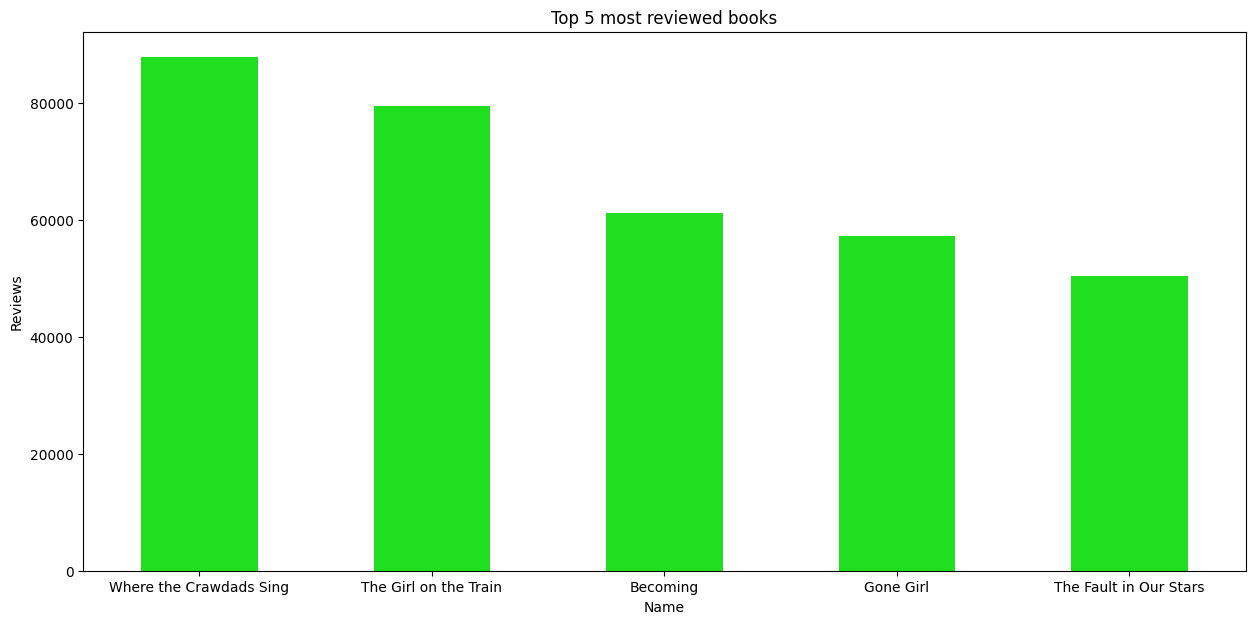

In [ ]:
top_books = new_df1.groupby('Name')['Reviews'].sum().sort_values(ascending=False).head(5).reset_index()

# create a barplot
plt.figure(figsize = (15,7))
sns.barplot(top_books, x = 'Name' , y = 'Reviews' , width = 0.5 , color='Lime')
plt.title("Top 5 most reviewed books")
plt.show()

**8. What is the distribution of book ratings?**

In [ ]:
# Use "new_df1" dataframe
print("Distribution of book ratings is :")
new_df1['User Rating'].value_counts()

Distribution of book ratings is :


4.8    81
4.6    69
4.7    66
4.5    39
4.9    28
4.4    26
4.3    21
4.2     8
4.1     5
4.0     4
3.9     2
3.8     1
3.6     1
3.3     1
Name: User Rating, dtype: int64

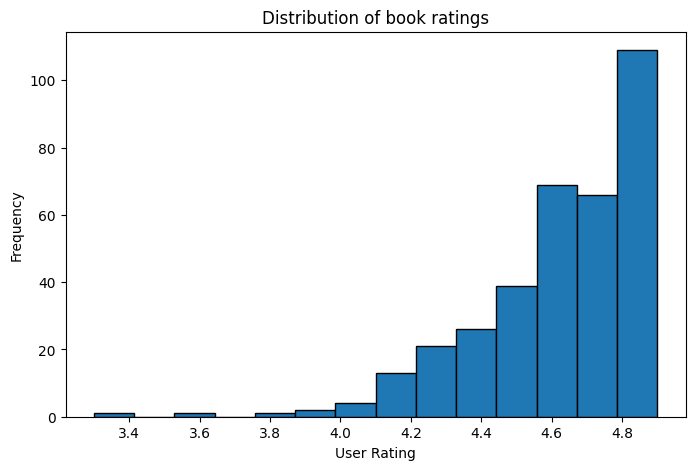

In [ ]:
# Create a hist plot for better visualization of distribution of book ratings
plt.figure(figsize = (8,5))
plt.hist(new_df1['User Rating'],bins=14,edgecolor='black')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.title('Distribution of book ratings')
plt.show()

**9. How many books have a rating greater than 4.5?**

In [ ]:
hight_rated_books = new_df1[new_df1['User Rating'] > 4.5].reset_index(drop=True)
numm_hight_rated_books = len(hight_rated_books)
print("There are",numm_hight_rated_books,"books have a rating greater than 4.5")

There are 244 books have a rating greater than 4.5


**10. What is the most common price range for books?**

In [ ]:
# For finding the most common price range for books here I try to remove outliers for better insigths
def iqr(DFcolumns):
        Q1 = np.percentile(DFcolumns, 25) #identify first quartile
        Q3 = np.percentile(DFcolumns, 75) #identfy third quartile

        IQR = Q3-Q1

        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)

        return lower_range, upper_range

lower_range,upper_range = iqr(am['Price'])

# here I remove outliers after doing iqr process and create anew dataframe "new_df2"
new_df2 = am[(am.Price > lower_range) & (am.Price < upper_range)]
new_df2

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
# find the price range
print(f"min price is {min(new_df2['Price'])} and max price is {max(new_df2['Price'])}")

min price is 0 and max price is 28


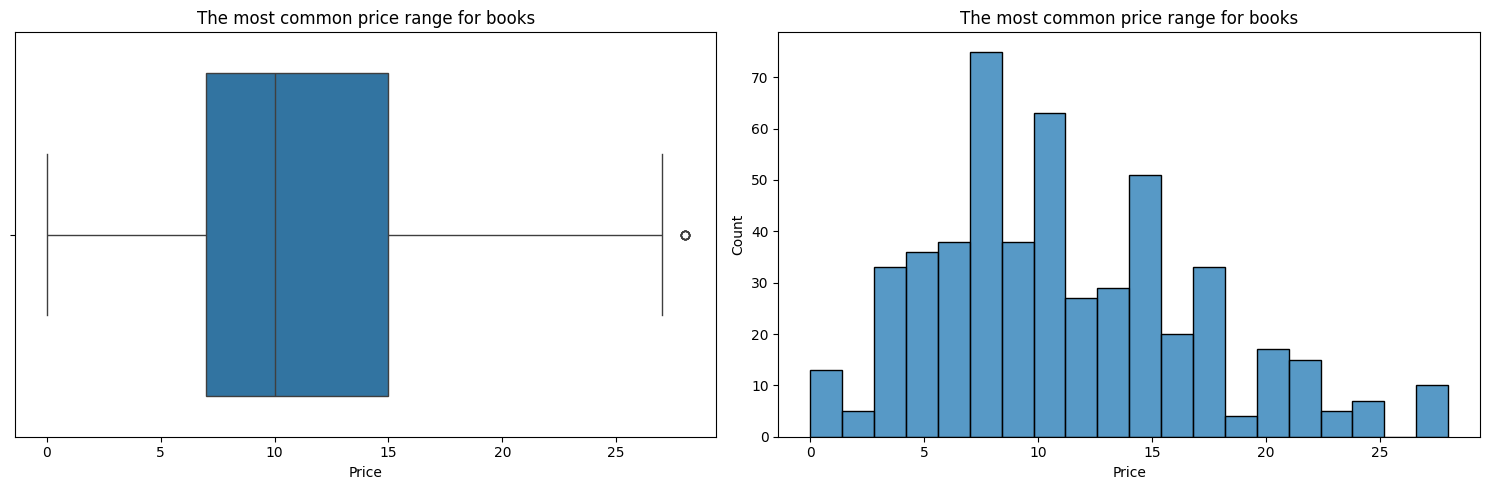

In [ ]:
# use boxplot and histplot for better insigths
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(new_df2 , x = 'Price')
plt.title("The most common price range for books")

plt.subplot(1,2,2)
sns.histplot(new_df2, x = 'Price' , bins = 20)
plt.title("The most common price range for books")

plt.tight_layout()
plt.show()

 * From above box and histplot we can see that common price range is in between 0 to 25

**11. What is the average number of reviews for books in each genre?**

In [ ]:
# use "new_df1" dataframe
print("The average number of reviews for books in each genre are : ")
(new_df1.groupby('Genre')['Reviews'].agg('mean')).round(2).reset_index(name='avg_reviews')

The average number of reviews for books in each genre are : 


,Genre,avg_reviews
0,Fiction,13111.07
1,Non Fiction,7013.77


**12. How does the average price vary across different genres?**

In [ ]:
# use original(copied) dataframe
print("The average price vary across different genres like this : ")
price_by_genre = (am.groupby('Genre')['Price'].agg('mean')).round(2).reset_index(name='avg_price')
price_by_genre

The average price vary across different genres like this : 


,Genre,avg_price
0,Fiction,10.85
1,Non Fiction,14.84


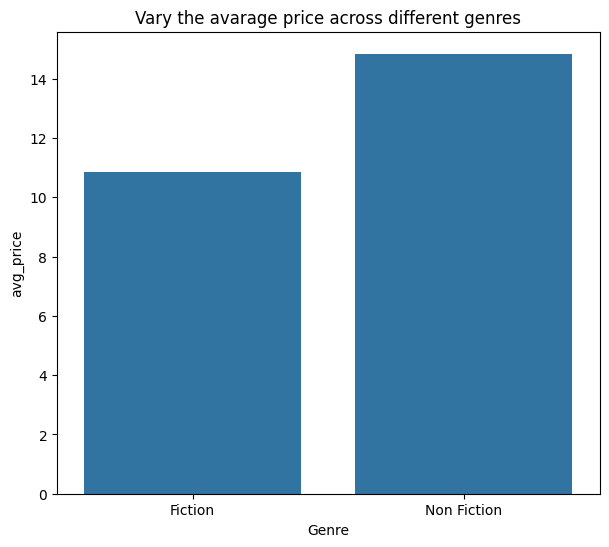

In [ ]:
# create a barplot
plt.figure(figsize = (7,6))
sns.barplot(price_by_genre , x='Genre' , y = 'avg_price')
plt.title("Vary the avarage price across different genres")
plt.show()

**13. What is the relationship between the number of reviews and the rating of books?**

In [ ]:
print("The relationship between the number of reviews and the rating of books is",am['Reviews'].corr(am['User Rating']),",which is nutral relationship")

The relationship between the number of reviews and the rating of books is -0.0017290142555501193 ,which is nutral relationship


In [ ]:
# create a correlation dataframe among all numerical columns of original(copied) dataframe
correlation_df = am.corr(numeric_only=True)
correlation_df

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


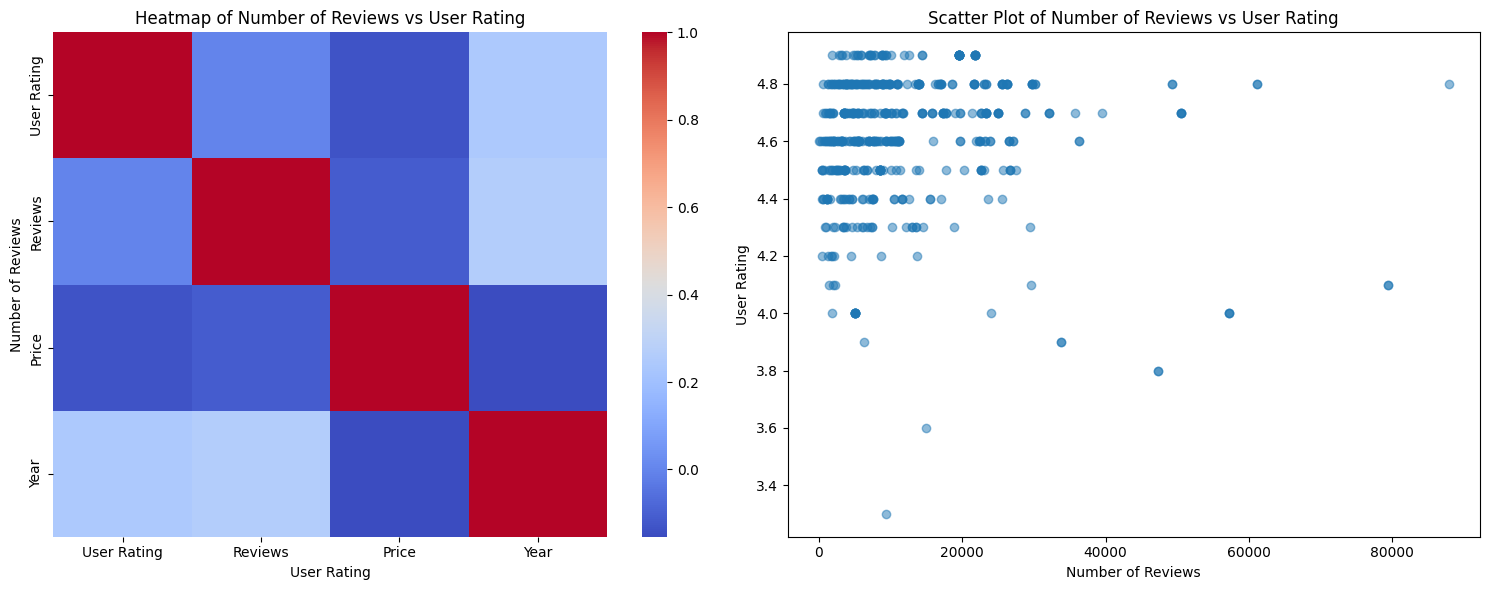

In [ ]:
plt.figure(figsize=(15, 6))

# Create a heatmap
plt.subplot(1,2,1)
sns.heatmap(correlation_df, cmap='coolwarm')
plt.xlabel('User Rating')
plt.ylabel('Number of Reviews')
plt.title('Heatmap of Number of Reviews vs User Rating')

# Create a scatter plot
plt.subplot(1,2,2)
plt.scatter(am['Reviews'], am['User Rating'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.title('Scatter Plot of Number of Reviews vs User Rating')


plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

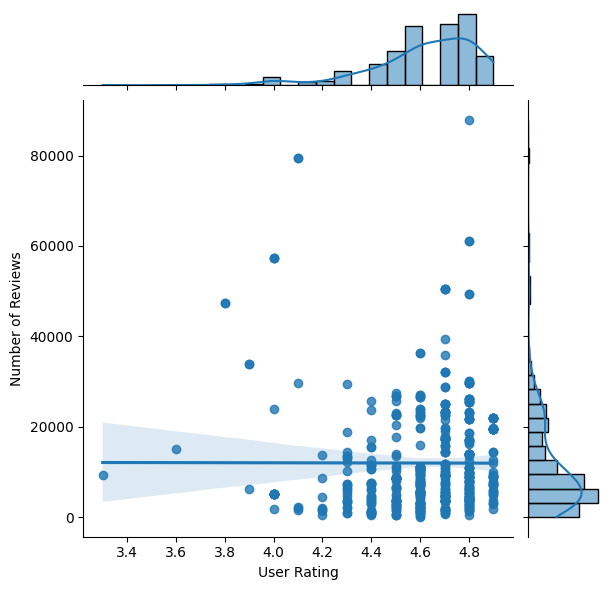

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(am,x='User Rating',y='Reviews',kind='reg')
plt.xlabel('User Rating')
plt.ylabel('Number of Reviews')
plt.show()

The correlation coefficient between 'User Rating' and 'Reviews' is very close to zero (approximately -0.0017). This suggests that there is almost no linear relationship between these two variables.
The heatmap doesn't show any strong correlation between 'User Rating' and 'Reviews'. The colors are neutral, indicating a lack of significant correlation.
The scatter plot of 'User Rating' against 'Reviews' doesn't show any clear pattern or trend. The points are scattered across the plot without following any discernible direction or shape.
The joint plot with a regression line doesn't indicate a strong linear relationship between 'User Rating' and 'Reviews'. The regression line is nearly horizontal, indicating that the slope (change in 'User Rating' for a unit change in 'Reviews') is close to zero.

Based on these observations, it seems that there is no strong linear relationship between the number of reviews and the rating of books. In other words, the number of reviews does not appear to be a significant predictor of the rating of books.

**14. What are the top 5 books with the highest ratings and the highest number of reviews?**

In [ ]:
# Use "new_df1" dataframe
print("The top 5 books with the highest ratings and the highest number of reviews are : ")
new_df1.groupby(['Name','Author']).agg({'User Rating':'max','Reviews':'sum'}).sort_values(by=['User Rating', 'Reviews'], ascending=[False, False]).head(5).reset_index()

The top 5 books with the highest ratings and the highest number of reviews are : 


,Name,Author,User Rating,Reviews
0,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834
1,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622
2,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576
3,The Very Hungry Caterpillar,Eric Carle,4.9,19546
4,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344


**15. How has the number of bestseller books published per year changed over time?**

1st approch

In [ ]:
# Here use original(copied) dataframe
# here I consider 1st year as a published year for every book and author combination,so I take minimum year
ydf = am.groupby(['Name','Author']).agg({'Year' : 'min'}).reset_index()
ydf

,Name,Author,Year
0,10-Day Green Smoothie Cleanse,JJ Smith,2016
1,11/22/63: A Novel,Stephen King,2011
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,2018
3,1984 (Signet Classics),George Orwell,2017
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,2019
...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,2012
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,2010
348,Wonder,R. J. Palacio,2013
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,2019


In [ ]:
# find total books published per year
change_over_years = ydf['Year'].value_counts().reset_index()

# change column name for clarity
change_over_years = change_over_years.rename(columns={'index':'Year','Year':'count_of_books_published'})
change_over_years

,Year,count_of_books_published
0,2009,50
1,2010,40
2,2013,33
3,2011,31
4,2018,31
5,2015,30
6,2016,28
7,2012,28
8,2017,27
9,2014,27


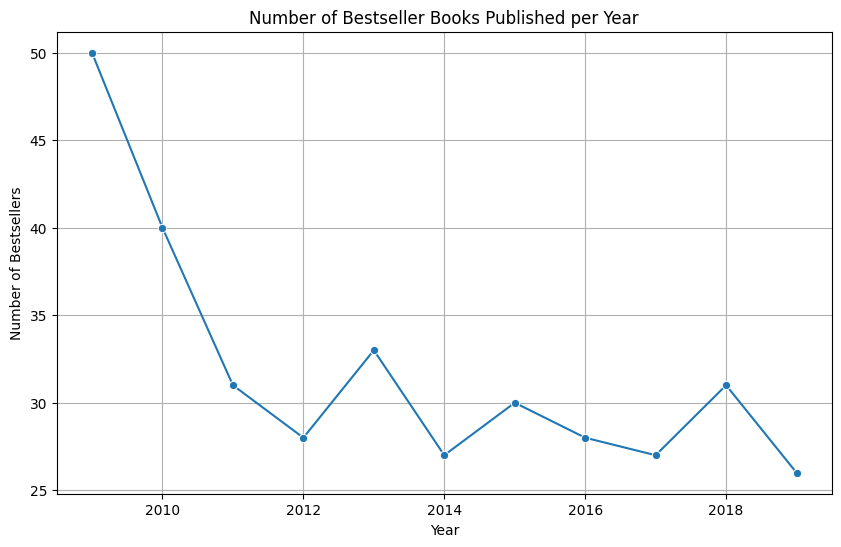

In [ ]:
# Create a lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(change_over_years,x='Year',y='count_of_books_published',marker='o')
plt.title('Number of Bestseller Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bestsellers')
plt.grid(True)
plt.show()

2nd approch

In [ ]:
# drop all duplicates books
unique_df=am.drop_duplicates(subset='Name')
unique_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [ ]:
# Here I use two threshold on 'User Rating' and 'Reviews' columns.
rating_threshold = 4.5
reviews_threshold = 10000

# Filter the DataFrame based on rating and reviews threshold
bestsellers_df = unique_df[(unique_df['User Rating'] >= rating_threshold) & (unique_df['Reviews'] >= reviews_threshold)].copy()

# Convert 'Year' column to datetime and extract the year
bestsellers_df.loc[:, 'Publication Year'] = pd.to_datetime(bestsellers_df['Year'], format='%Y').dt.year

# Group by 'Publication Year' and count the number of bestsellers per year
bestsellers_per_year = bestsellers_df.groupby('Publication Year').size()

bestsellers_per_year


Publication Year
2009     4
2010     5
2011     5
2012     8
2013     9
2014    12
2015     9
2016    10
2017     8
2018     9
2019     8
dtype: int64

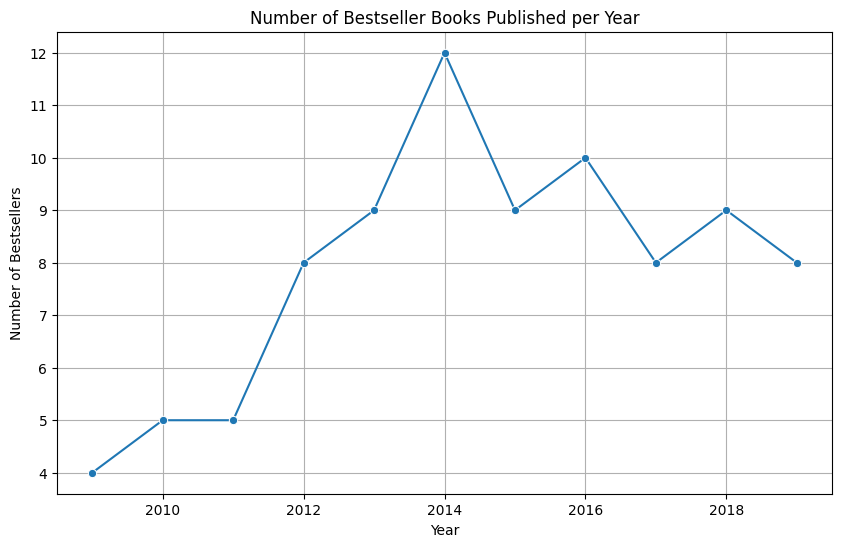

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=bestsellers_per_year, marker='o')
plt.title('Number of Bestseller Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bestsellers')
plt.grid(True)
plt.show()